## Introduction to the file data-format

The simple data recording setup employed just a smart phone and it allowed not only to display the recorded extracellular electrical voltage over time $V(t)$, but also to store the actual measurements on disk, as a sequence of samples: ${V(\Delta t), V(2\Delta t), V(3\Delta t), V(4\Delta t), V(5\Delta t), V(6\Delta t),..., V(N\Delta t)}$.

Indeed also for recording real data (not only for solving numerically differential equations) on a computer, we must discretise time (i.e. called *sampling* in the context of data acquisition). Obviously, the smaller the $\Delta t$ (called *sampling interval*) or equivalently the higher $1/\Delta t$ (called *sampling rate*), the more accurate and faithful the recording of a phenomenon that was intrinsically time-continous. If you want to learn more about sampling of real-world data, go to https://en.wikipedia.org/wiki/Sampling_(signal_processing) or even to  https://en.wikipedia.org/wiki/Nyquist–Shannon_sampling_theorem if you are brave.

By this notebook, I would like to load the files in the memory of the computer and just plot it. There is a first practical obstacle to overcome, which has nothing conceptual behind: the format by which the data were stored on disk. You probably know that the name of files may have a suffix .doc if created by Microsoft Office Word, *.jpg or *.gif if created by a image acqusition or processing software (e.g. Photoshop, your digital camera, etc.), or *.avi or *.mp4, if containing a movie. The difference is not only in the file name but also in the actual structure of the file (you can think a file like a blank slate where you write by some *code* the information you need to represent accurately and without losses the file).

The data file recorded from the cockroach experiment were saved in a specific format called Waveform Audio File Format (WAVE, or more commonly known as WAV due to its filename extension"WAVE"). You can learn more on this file format if you want by starting on Wikipedia. https://en.wikipedia.org/wiki/WAV 

### Loading the files into the memory

Because the data is stored on disk, and are in the .WAV format, we must first load them in the memory of the computer and in a correct way (i.e. we must know the code by which they have been written on disk). To do so, we can use an add-on to Julia, called "WAV" package. As it is not installed by default (on your own system), and it might not be installed on JuliaBox, we first invoke a command to install such a package (it might a long time the first time).

In [1]:
Pkg.add("WAV")

# If using next.JuliaBox.com and getting the message "INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.", then please follow the indication and add WAV as an additional package from the next.JuliaBox.com home screen.

INFO: Pkg operations are not possible on JuliaBox. Please use the "Packages" menu at the top of the main screen.


Let me check that the actual files are in the current working directory, by invoking this command (watch out the *backticks*, as they are NOT single quotes!). If the following command does not show you a list of files containing *A.wav*, *B.wav*, etc. you must physically upload them remotely to your Julia setup.

In [2]:
run(`ls`)    # List the content of the current working directory of this notebook (see ?run)

A1.wav
Cockroach recordings playground.ipynb
FirstAssignment_Hints.ipynb
Functions of one variable.ipynb
Julia_Quick_reference.ipynb
Jupyter_Markdown_Tutorial.ipynb
README.md


Let's now use the WAV package to load into the memory of the computer, one file (e.g. A1.wav)

In [3]:
using WAV
V, fs = wavread("A1.wav");    # see ?wavread for the correct syntax if you are curious

# The function returned the sampling rate in 'fs' (in Hz) and the actual data points in 'V'

N  = length(V);               # How long is the vector V?
Δt = 1000/fs;                 # The sampling interval (in ms) is derived here, from fs

LoadError: [91mArgumentError: Module WAV not found in current path.
Run `Pkg.add("WAV")` to install the WAV package.[39m

In [7]:
using PyPlot                  # Let's use the Plot package now
t = (0:(N-1)) * Δt;           # I created another vector, as a time axis, for plotting purposes

0.0f0:0.022675738f0:30766.418f0

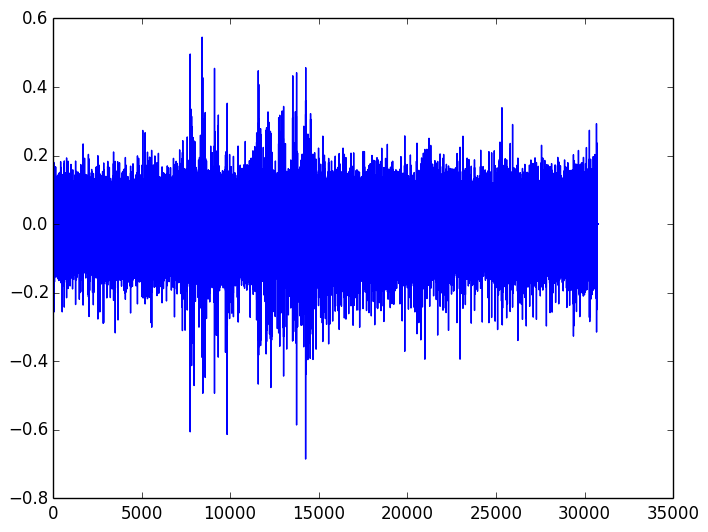

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31fc64550>

In [8]:
plot(t,V)

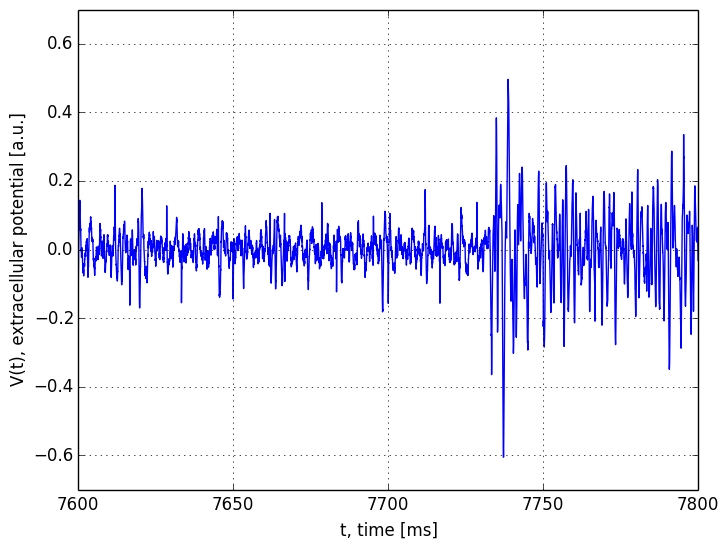

In [15]:
# I must confess I like plotting, zooming, and aesthetics..

plot(t,V)
xlabel("t, time [ms]");                              # Label for the horizontal axis
ylabel("V(t), extracellular potential [a.u.]");             # Label for the vertical axis
grid("on");                                                     # "Grid" on

ax = gca();


# Try to change yourself the horizontal limits..

ax[:set_xlim]((7600,7800));                    # For axes "ax" set the horizontal limits
ax[:set_ylim]((-0.7,0.7));                      # For axes "ax" set the vertical limits
ax[:legend](loc="best");                        # Optimal placement of the legend